## Import Library

In [1]:
import pandas as pd
import numpy as np
import json, re
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
files = ['../data/batch_1/batch1_1.csv', '../data/batch_1/batch1_2.csv', '../data/batch_1/batch1_3.csv']

In [3]:
dfs = [pd.read_csv(f, engine='python') for f in files]
df_all = pd.concat(dfs, ignore_index=True)

In [4]:
df_all.head()

,File Name,Json Data,OCRed Text
0,batch1-0494.jpg,"\n{\n ""invoice"": {\n ""client_name"": ""Clark...",Invoice no: 84652373 Date of issue: 02/23/2021...
1,batch1-0489.jpg,"\n{\n ""invoice"": {\n ""client_name"": ""Willi...",Invoice no: 37451664 Date of issue: 06/11/2020...
2,batch1-0499.jpg,"\n{\n ""invoice"": {\n ""client_name"": ""Heste...",Invoice no: 40108666 Date of issue: 02/07/2020...
3,batch1-0497.jpg,"\n{\n ""invoice"": {\n ""client_name"": ""Olson...",Invoice no: 73285932 Date of issue: 07/25/2017...
4,batch1-0081.jpg,"\n{\n ""invoice"": {\n ""client_name"": ""Wilso...",Invoice no: 15288019 Date of issue: 09/07/2014...


## EDA

In [5]:
print("Shape:", df_all.shape)
print(df_all.info())

Shape: (1414, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   File Name   1414 non-null   object
 1   Json Data   1414 non-null   object
 2   OCRed Text  1414 non-null   object
dtypes: object(3)
memory usage: 33.3+ KB
None


In [7]:
print("Missing values per column:")
print(df_all.isnull().sum())

Missing values per column:
File Name     0
Json Data     0
OCRed Text    0
dtype: int64


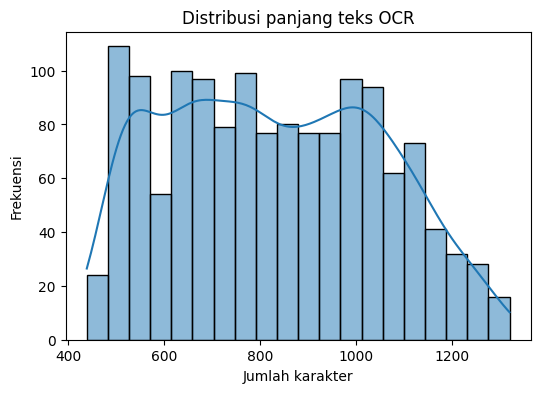

In [8]:
df_all["ocr_len"] = df_all["OCRed Text"].astype(str).apply(len)
plt.figure(figsize=(6,4))
sns.histplot(df_all["ocr_len"], bins=20, kde=True)
plt.title("Distribusi panjang teks OCR")
plt.xlabel("Jumlah karakter")
plt.ylabel("Frekuensi")
plt.show()